<a href="https://colab.research.google.com/github/Niam-06/project1-classification-with-CNN/blob/main/latihan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


##menyiapkan driektori

In [ ]:
base_dir = '/content/drive/My Drive/dataset/'
!ls "/content/drive/My Drive/dataset/"

bahan  latih  validasi


##Menentukan direktori

In [ ]:
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir =os.path.join(base_dir, 'validasi')

##menentukan direktori isi bahan


In [ ]:
daun_kering_dir = os.path.join(bahan_dir, 'daun_kering/')
daun_mozaik_dir = os.path.join(bahan_dir, 'daun_mozaik/')
daun_sehat_dir = os.path.join(bahan_dir, 'daun_sehat/')

print('Jumlah Data train tiap kelas')
print(f"daun kering: {len(os.listdir(daun_kering_dir))}")
print(f"daun mozaik: {len(os.listdir(daun_mozaik_dir))}")
print(f"daun sehat: {len(os.listdir(daun_sehat_dir))}")


Jumlah Data train tiap kelas
daun kering: 237
daun mozaik: 311
daun sehat: 235


In [ ]:
# direktori isi latih/training
train_daun_kering = os.path.join(train_dir, 'daun_kering/')
train_daun_mozaik = os.path.join(train_dir, 'daun_mozaik/')
train_daun_sehat = os.path.join(train_dir, 'daun_sehat/')

#direktori isi validasi
validation_daun_kering = os.path.join(validation_dir, 'daun_kering/')
validation_daun_mozaik = os.path.join(validation_dir, 'daun_mozaik/')
validation_daun_sehat = os.path.join(validation_dir, 'daun_sehat/')

##menyiapkan dataset

In [ ]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
    total_size = len(os.listdir(source))
    train_size = int(train_ratio * total_size)
    val_size = total_size - train_size

    randomized = random.sample(os.listdir(source), total_size)
    train_files = randomized[0:train_size]
    val_files = randomized[train_size:total_size]

    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i)
        copyfile(i_file, destination)

    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i)
        copyfile(i_file, destination)

# Jumlah pembagian data train & testing
train_ratio = 0.9

# Pembagian training dan validasi
source_00 = daun_kering_dir
train_00 = train_daun_kering
val_00 = validation_daun_kering
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = daun_mozaik_dir
train_01 = train_daun_mozaik
val_01 = validation_daun_mozaik
train_val_split(source_01, train_01, val_01, train_ratio)

source_02 = daun_sehat_dir
train_02 = train_daun_sehat
val_02 = validation_daun_sehat
train_val_split(source_02, train_02, val_02, train_ratio)


In [ ]:
print('total daun_kering            :" ', len(os.listdir(daun_kering_dir)))
print('total train daun_kering      :" ', len(os.listdir(train_daun_kering)))
print('total val daun_kering        :" ', len(os.listdir(validation_daun_kering)))

total daun_kering            :"  237
total train daun_kering      :"  235
total val daun_kering        :"  46


##pre processing

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    zoom_range=0.2
)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    zoom_range=0.2
)

In [ ]:
# target
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 775 images belonging to 3 classes.
Found 152 images belonging to 3 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi telah mencapai >99%!")
      self.model.stop_training = True
callbacks = myCallback()


##model CNN

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
# cmopile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
# pelatihan model
history = model.fit(
      train_generator,
      steps_per_epoch=9,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=1,
      verbose=1,
      callbacks=[callbacks])

Epoch 1/25
9/9 [==============================] - 22s 3s/step - loss: 0.1686 - accuracy: 0.9430 - val_loss: 0.0596 - val_accuracy: 0.9688
Epoch 2/25
9/9 [==============================] - 22s 2s/step - loss: 0.0839 - accuracy: 0.9618 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 3/25
9/9 [==============================] - 22s 2s/step - loss: 0.0741 - accuracy: 0.9688 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 4/25
9/9 [==============================] - 24s 3s/step - loss: 0.2406 - accuracy: 0.9132 - val_loss: 0.1055 - val_accuracy: 0.9688
Epoch 5/25
9/9 [==============================] - 23s 3s/step - loss: 0.3062 - accuracy: 0.8924 - val_loss: 0.1145 - val_accuracy: 0.9375
Epoch 6/25
9/9 [==============================] - 22s 3s/step - loss: 0.1832 - accuracy: 0.9306 - val_loss: 0.0528 - val_accuracy: 1.0000
Epoch 7/25
9/9 [==============================] - 26s 3s/step - loss: 0.0907 - accuracy: 0.9653 - val_loss: 0.0390 - val_accuracy: 1.0000
Epoch 8/25
9/9 [==================

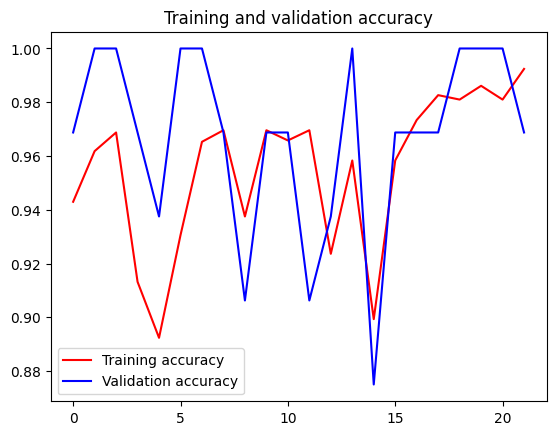

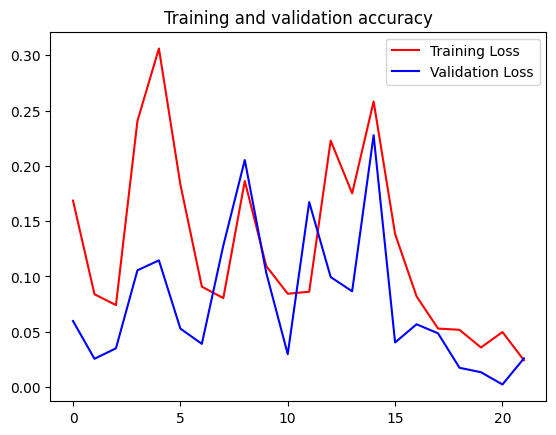

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation accuracy')
plt.legend(loc = 'best')
plt.show()

##testing model

In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Definisikan daftar kelas
class_list = ['daun kering', 'daun mozaik', 'daun sehat']

uploaded = files.upload()

for fn in uploaded.keys():
    # Prediksi gambar
    path = fn
    img = load_img(path, target_size=(150, 150))
    x = np.array(img)
    x = np.expand_dims(x, axis=0)

    image = np.vstack([x])
    classes = model.predict(image, batch_size=10)

    print(fn)

    # Ambil indeks kelas dengan probabilitas tertinggi
    predicted_class_index = np.argmax(classes[0])
    predicted_class = class_list[predicted_class_index]
    print('Gambar ini termasuk dalam kelas:', predicted_class)


Saving 3.jpg to 3 (1).jpg
1/1 [==============================] - 0s 44ms/step
3 (1).jpg
Gambar ini termasuk dalam kelas: daun sehat
